In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances

In [46]:
df = pd.read_excel("results_graphmatching.xlsx", sheet_name='res', header=0)

In [47]:
df

,P1Main,P1Pert1,P1Pert2,P1Pert3,P2Main,P2Pert1,P2Pert2,P2Pert3,P3Main,P3Pert1,P3Pert2,P3Pert3,P4Main,P4Pert1,P4Pert2,P4Pert3
P1Main,1.000000,0.980958,0.817307,0.860703,0.806505,0.816484,0.801783,0.780100,0.777499,0.784918,0.808967,0.814828,0.827899,0.835916,0.832840,0.832890
P1Pert1,0.833247,0.987302,0.826014,0.911404,0.799284,0.800515,0.819086,0.785215,0.793441,0.816311,0.795493,0.827815,0.841583,0.816179,0.840720,0.821919
P1Pert2,0.856634,0.830024,0.884737,0.927224,0.801306,0.796051,0.799167,0.829223,0.768070,0.779076,0.805632,0.821647,0.803415,0.804485,0.833748,0.843701
P1Pert3,0.941205,0.870516,0.889409,0.906003,0.795207,0.800125,0.790013,0.800880,0.786321,0.799788,0.798587,0.824522,0.835319,0.818596,0.837570,0.850375
P2Main,0.804263,0.793114,0.779299,0.806838,1.000000,0.988700,0.965141,0.963418,0.807885,0.803334,0.813170,0.817938,0.790648,0.814645,0.830701,0.821831
P2Pert1,0.802225,0.796932,0.806472,0.796376,0.974590,0.986063,0.954395,0.933652,0.793305,0.808125,0.828615,0.826887,0.803018,0.804395,0.816572,0.795893
P2Pert2,0.797525,0.792191,0.815230,0.805107,0.965141,0.964722,0.952195,0.917031,0.776511,0.825502,0.805794,0.810533,0.776929,0.797884,0.814938,0.818109
P2Pert3,0.783891,0.816842,0.806807,0.793176,0.963418,0.947381,0.939741,1.000000,0.780721,0.785646,0.805639,0.816575,0.792222,0.798346,0.820414,0.813110
P3Main,0.788213,0.793866,0.788540,0.777900,0.796743,0.787779,0.781119,0.774017,0.977591,0.974441,0.866742,0.871924,0.790971,0.797074,0.801411,0.787307
P3Pert1,0.827128,0.772972,0.781085,0.786359,0.788043,0.791654,0.792354,0.788239,0.974441,0.978836,0.887572,0.869972,0.830990,0.819327,0.770193,0.829538


In [48]:
labels = ["P{}{}".format(i, t) for i in range(1, 5) for t in ["Main"] + ["Pert{}".format(j) for j in range(1,4)] ]

labels

['P1Main',
 'P1Pert1',
 'P1Pert2',
 'P1Pert3',
 'P2Main',
 'P2Pert1',
 'P2Pert2',
 'P2Pert3',
 'P3Main',
 'P3Pert1',
 'P3Pert2',
 'P3Pert3',
 'P4Main',
 'P4Pert1',
 'P4Pert2',
 'P4Pert3']

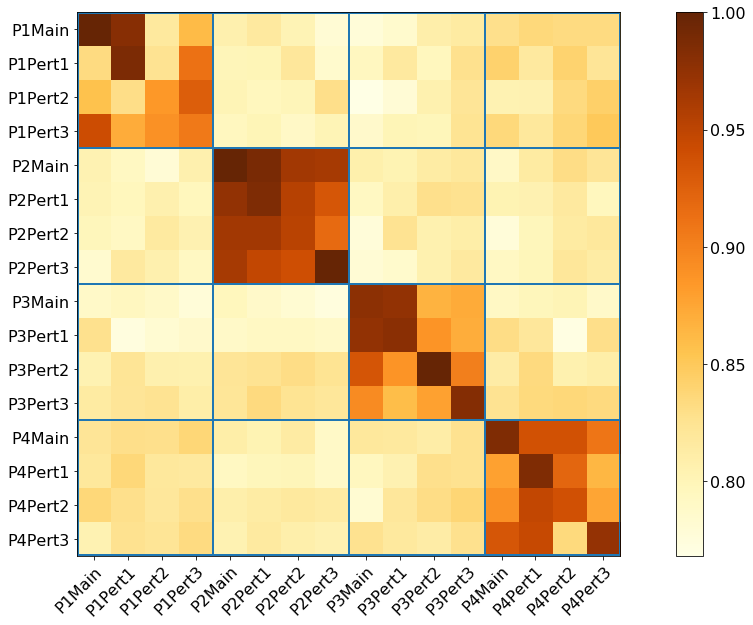

In [49]:
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(df, cmap=plt.get_cmap('YlOrBr'))

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

lns = [-0.48] + [3.5 + 4 * i for i in range(3)] + [15.48]
ax.hlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)
ax.vlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)

cbar = ax.figure.colorbar(im, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#fig.tight_layout()
plt.show()

In [57]:
from gensim.models import KeyedVectors
from gensim.models import Doc2Vec
from loadRandomWalks import get_doc_list as get_doc_list_model
from loadXES import get_doc_list as get_doc_list_log, get_doc_multiple_XES_tagged2

In [58]:
model = Doc2Vec.load('output/generatedL2VVS16.model')
docs = get_doc_list_log('generated')
df_log = pd.DataFrame.from_records([model.docvecs[tag] for tag in docs], 
        index=[d.replace('input/generated/', '').replace('Generated.xes', '') for d in docs])
df_log

Found 16 documents under the dir generated .....


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P1Main,-0.094569,0.328632,0.452936,0.562041,0.788415,-0.210015,0.902785,0.132456,0.128419,0.002304,1.669504,-0.501527,-0.245202,0.515683,0.786921,-0.706171
P1Pert1,-0.758861,0.105215,0.057831,-0.011545,0.968566,-0.450268,-0.325375,-0.483202,-0.174540,1.440784,0.319299,0.239849,-0.569986,-0.064971,0.875283,0.234419
P1Pert2,1.064868,-0.743323,-0.072662,-1.207026,0.259183,-0.381653,0.477875,-0.180738,0.271144,0.630567,-0.354900,-0.037945,-0.415560,0.366158,0.202252,-0.685396
P1Pert3,-0.252501,0.461220,1.033514,0.347640,0.429434,-0.083982,-0.006741,0.105744,0.105575,0.686962,1.041143,-0.482300,0.018384,0.252906,0.530488,-0.465710
P2Main,-0.120872,0.510533,-0.274939,0.270246,0.303490,0.235518,0.053369,0.064429,-0.071200,0.629147,0.926980,0.311219,-0.304152,-0.410700,0.656328,0.573763
P2Pert1,-0.199795,-0.258265,0.719097,0.102263,0.059482,0.112515,0.025046,-0.266028,0.233155,0.501886,0.191462,0.214615,0.271034,1.264513,-0.238024,1.216402
P2Pert2,0.098205,-1.484970,-0.124417,0.196665,0.461218,-0.995325,-0.047252,0.358189,-0.701584,0.543789,0.000162,-0.490790,0.588426,0.227173,0.203495,0.611269
P2Pert3,0.411834,-0.718324,0.098621,-1.107619,-0.191212,0.036153,-0.742988,-0.641616,-0.272537,0.081040,0.732177,-0.330495,-0.564356,0.092175,-0.811417,0.060478
P3Main,0.302936,0.305802,-0.398034,-0.953622,-0.310893,0.262762,1.056902,-1.506454,-0.629637,-0.244258,1.401921,0.931041,0.931026,0.266840,0.894177,1.194181
P3Pert1,0.101687,0.425845,-0.276022,-1.040625,0.322740,-0.015890,0.383164,-1.344827,-0.489682,-0.001459,1.357333,0.466635,-0.356613,1.288399,0.708498,0.948295


In [59]:
model = Doc2Vec.load('output/PLG2WalksResultsM2VVS16.model')
docs = get_doc_list_model('PLG2', 'WalksResults')
df_mdl = pd.DataFrame.from_records([model.docvecs[tag] for tag in docs], 
        index=[d.replace('input/PLG2/WalksResults/', '').replace('RandomWalks.txt', '') for d in docs])
df_mdl

Found 16 documents under the dir PLG2 .....


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P1Main,-0.792699,0.457615,-0.231271,0.008435,0.759525,-0.087139,0.693407,-0.302166,0.797657,0.596562,0.068673,-0.806407,0.386337,-0.199729,0.347829,0.664808
P1Pert1,-1.620951,-0.543077,0.051500,-0.372010,-0.131040,-0.044429,-0.142969,-0.205072,0.352183,0.132696,-0.907316,-0.605944,-0.017389,0.456143,0.145315,0.541816
P1Pert2,-0.385401,-0.171319,-1.385718,0.384058,1.257703,-0.812304,-0.062348,-0.855239,0.293520,0.059846,-1.459084,0.336437,-0.030000,-0.690149,0.973795,0.666129
P1Pert3,-0.401008,-0.341670,-0.608766,1.327038,0.326507,-0.226718,0.364559,0.329319,-0.002197,0.714081,-0.352136,-0.780533,1.665011,0.068698,0.928034,-0.282140
P2Main,0.359825,-0.784124,1.576864,0.454277,-0.343862,-1.111863,0.850481,-1.098700,0.335329,-0.117638,-0.073610,-0.461328,0.131366,-0.066805,0.041306,0.330544
P2Pert1,0.476253,-1.107566,0.350539,0.370958,-0.149488,-0.952530,-0.783147,-1.303220,0.606634,0.356318,0.567371,0.196169,0.040364,0.752470,0.568065,0.112153
P2Pert2,0.406859,-0.833136,-0.026089,0.044537,0.012060,-0.948091,-0.055448,0.670823,0.247609,1.199686,-0.128827,-0.012535,0.661554,-0.858635,-0.907283,0.930060
P2Pert3,0.655290,-1.116709,0.781457,-0.306487,0.621627,-0.501956,-0.411175,0.295702,0.780430,-0.697005,-0.734874,0.153304,1.142709,0.416899,0.230066,0.507505
P3Main,-0.794477,-1.490175,0.101935,0.436203,-0.378192,0.403418,0.440900,0.063050,1.930284,0.455326,-0.148715,0.048190,-0.452807,0.783281,0.505888,-0.287031
P3Pert1,-0.822499,-0.577790,0.714331,1.174420,0.661891,-0.067705,-0.274761,-0.239707,1.010505,1.011620,-0.432718,0.386137,-0.584647,0.733234,0.247184,0.208182


In [60]:
df_c = pd.concat([df_mdl, df_log], axis=1)
df_c

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
P1Main,-0.792699,0.457615,-0.231271,0.008435,0.759525,-0.087139,0.693407,-0.302166,0.797657,0.596562,...,0.902785,0.132456,0.128419,0.002304,1.669504,-0.501527,-0.245202,0.515683,0.786921,-0.706171
P1Pert1,-1.620951,-0.543077,0.051500,-0.372010,-0.131040,-0.044429,-0.142969,-0.205072,0.352183,0.132696,...,-0.325375,-0.483202,-0.174540,1.440784,0.319299,0.239849,-0.569986,-0.064971,0.875283,0.234419
P1Pert2,-0.385401,-0.171319,-1.385718,0.384058,1.257703,-0.812304,-0.062348,-0.855239,0.293520,0.059846,...,0.477875,-0.180738,0.271144,0.630567,-0.354900,-0.037945,-0.415560,0.366158,0.202252,-0.685396
P1Pert3,-0.401008,-0.341670,-0.608766,1.327038,0.326507,-0.226718,0.364559,0.329319,-0.002197,0.714081,...,-0.006741,0.105744,0.105575,0.686962,1.041143,-0.482300,0.018384,0.252906,0.530488,-0.465710
P2Main,0.359825,-0.784124,1.576864,0.454277,-0.343862,-1.111863,0.850481,-1.098700,0.335329,-0.117638,...,0.053369,0.064429,-0.071200,0.629147,0.926980,0.311219,-0.304152,-0.410700,0.656328,0.573763
P2Pert1,0.476253,-1.107566,0.350539,0.370958,-0.149488,-0.952530,-0.783147,-1.303220,0.606634,0.356318,...,0.025046,-0.266028,0.233155,0.501886,0.191462,0.214615,0.271034,1.264513,-0.238024,1.216402
P2Pert2,0.406859,-0.833136,-0.026089,0.044537,0.012060,-0.948091,-0.055448,0.670823,0.247609,1.199686,...,-0.047252,0.358189,-0.701584,0.543789,0.000162,-0.490790,0.588426,0.227173,0.203495,0.611269
P2Pert3,0.655290,-1.116709,0.781457,-0.306487,0.621627,-0.501956,-0.411175,0.295702,0.780430,-0.697005,...,-0.742988,-0.641616,-0.272537,0.081040,0.732177,-0.330495,-0.564356,0.092175,-0.811417,0.060478
P3Main,-0.794477,-1.490175,0.101935,0.436203,-0.378192,0.403418,0.440900,0.063050,1.930284,0.455326,...,1.056902,-1.506454,-0.629637,-0.244258,1.401921,0.931041,0.931026,0.266840,0.894177,1.194181
P3Pert1,-0.822499,-0.577790,0.714331,1.174420,0.661891,-0.067705,-0.274761,-0.239707,1.010505,1.011620,...,0.383164,-1.344827,-0.489682,-0.001459,1.357333,0.466635,-0.356613,1.288399,0.708498,0.948295


In [61]:
res = cosine_distances(df_c)
res = 1 - res / np.max(res)

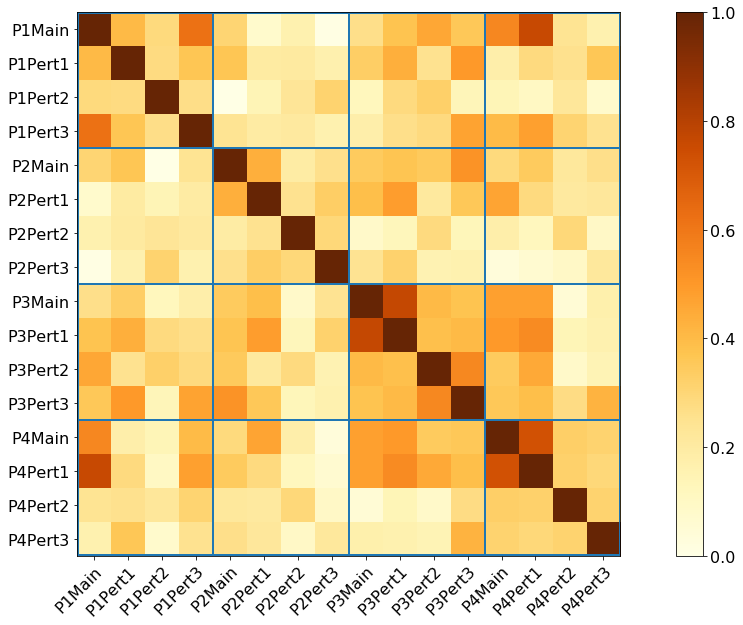

In [62]:
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(res, cmap=plt.get_cmap('YlOrBr'))

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

lns = [-0.48] + [3.5 + 4 * i for i in range(3)] + [15.48]
ax.hlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)
ax.vlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)

cbar = ax.figure.colorbar(im, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#fig.tight_layout()
plt.show()

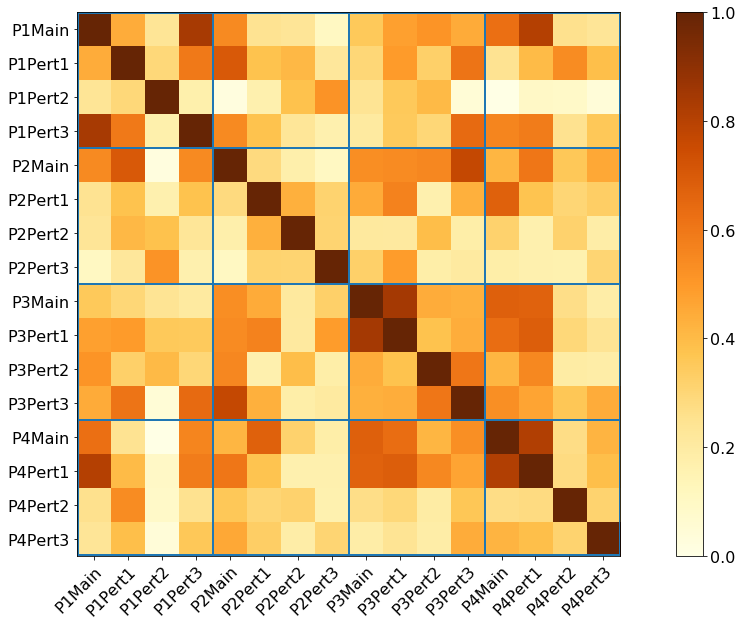

In [64]:
res = cosine_distances(df_log)
res = 1 - res / np.max(res)

matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(res, cmap=plt.get_cmap('YlOrBr'))

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

lns = [-0.48] + [3.5 + 4 * i for i in range(3)] + [15.48]
ax.hlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)
ax.vlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)

cbar = ax.figure.colorbar(im, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#fig.tight_layout()
plt.show()